**Title**: CLI Ingest Command Tutorial with Demo Data <br>
**Date**:  Nov 2020 <br>
**Description**:  
This tutorial demonstrates the Flywheel CLI Ingest command, including a few examples of the command usage with demo data.

# Requirements
- Access to a Flywheel instance.
- Read/Write permission to at least one Flywheel Group.

<div class="alert alert-block alert-danger"><b>DISCLAMER:</b> All the commands in this notebook will be prefixed with <code>!</code> character so that the command can be excuted from the Jupyter Notebook. Please remove <code>!</code> when running the command in the terminal.</div>



# Flywheel CLI

The Flywheel CLI (command line interface) is a set of tools that allows us to interact with Flywheel and our data from a terminal. With the Flywheel CLI, you can view, download, and upload data, run jobs, build and test gears, and more. In this tutorial, we cover one of the Flywheel CLI tools, namely, `fw ingest`.

## Install the Flywheel CLI
Follow these steps [to install the Flywheel CLI](https://docs.flywheel.io/hc/en-us/articles/360008162214)

Once you have successfully installed the Flywheel CLI, you will be able to login with your API Key using the command below.

In [ ]:
! fw login <your-api-key-here>

You should see a message like below:
```
You are now logged in as <your-username>!
```

# CLI Ingest Command

## 1. `fw ingest folder`

### What is this
The `fw ingest folder` command will import data that follow the folder structure of Flywheel Hierarchy. 

### When to use
You are more likely to be using this command if you are importing data that you previously downloaded from Flywheel, or if you are importing data that was shared from another Flywheel site.

The figure below is the basic Flywheel Hierarchy.


![image.png](https://docs.flywheel.io/hc/article_attachments/360098824273/hierarchyfolders.png)
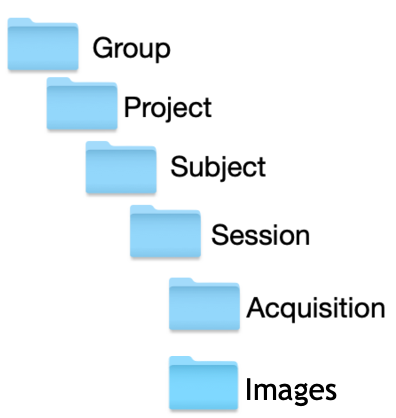

Now let's work through an example workflow to run the `fw ingest folder` command.

To get started, let's first download some demo data that we will be using for this section. Run the command below to download the demo data as `data.zip` and unzip the folder and name it as `demo-data`. Note: The demo data is less than 20MB in size.

### Usage

In [ ]:
!curl -L -o data.zip "https://drive.google.com/uc?export=download&id=1IDYouZsytuE6Rk9b66KQyldlam8yIcO5"

In [ ]:
!unzip -q data.zip -d demo-data 

Let's look at the folder structure for `demo-data`. If you have the `tree` command installed, you can see this by executing `tree demo-data/`

```
demo-data
├── anx_s1
│   └── anx_s1_anx_ses1_protA
│       └── T1_high-res_inplane_Ret_knk_0
│           └── 6879_3_1_t1.dcm.zip
├── anx_s2
│   └── anx_s2_anx_ses1_protA
│       └── T1_high-res_inplane_FSPGR_BRAVO_0
│           └── 4784_3_1_t1.dcm.zip
├── anx_s3
│   └── anx_s3_anx_ses1_protA
│       └── T1_high-res_inplane_Ret_knk_0
│           └── 6879_3_1_t1.dcm.zip
├── anx_s4
│   └── anx_s4_anx_ses2_protB
│       └── T1_high-res_inplane_Ret_knk_1
│           └── 8403_4_1_t1.dcm.zip
├── anx_s5
│   └── anx_s5_anx_ses1_protA
│       └── T1_high-res_inplane_Ret_knk_1
│           └── 8403_4_1_t1.dcm.zip
└── participants.csv
```

Now we can upload the demo-data to your Flywheel instance. 
`fw ingest folder` positionally requires `SRC` argument which is the parent folder to the directory you want to import. In other words, the path to the folder to import. In this example, we are adding the `--group` ID and `--project` label flags, both of which are optional arguments.\n", We are also adding the `-y` at the end of the command to bypass the confirm upload input request.


Please modify the code below with your `group-label` and `project-label` prior to running the command below. 


In [ ]:
!fw ingest folder demo-data --group <replace-your-group-label-here> --project <replace-your-project-label-here> -y

Below is how the output would look like

```python
Created             [2020-12-14 13:12:18]

Scanning            [2020-12-14 13:12:18]
1/1 files, 15MB (1s)

Resolving           [2020-12-14 13:12:19]
100.0% (1s)

In review           [2020-12-14 13:12:20]
Hierarchy:
  Groups: 1
  Projects: 1
  Subjects: 5
  Sessions: 5
  Acquisitions: 5
  Files: 6
  Packfiles: 0


Preparing           [2020-12-14 13:12:20]
100.0% (3s)

Uploading           [2020-12-14 13:12:23]
100.0% - (0 failed) (12s)
Completed: 5
Skipped: 1
Total: 6

Finalizing          [2020-12-14 13:12:35]
100.0% (2s)

Finished            [2020-12-14 13:12:37]

Final report
Total elapsed time: 19s

Flywheel CLI 14.4.2 build a78451d2cbd7d780e6baa476357f788a33b750fa on 2020-11-17 16:28
```


## 2.`fw ingest dicom`

### What is this
- The `fw ingest dicom` command reads through directories of DICOM files and uses the DICOM header information to group them into the correct Acquisitions and Sessions in Flywheel. 

<div class="alert alert-block alert-danger"><b>WARNING:</b> The <code>fw ingest dicom</code> command requires Flywheel CLI version 11.0.0 or later. Please check your Flywheel CLI version by running `fw version` before running the `fw ingest dicom`</div>

### When to use
- This command is useful when your data does not follow the Flywheel Hierarchy and is organized based on the Acquisition information of the DICOM header.

Below is an example of the folder structure that we will be using in this section.

### Usage

In [ ]:
!curl -L -o dicom.zip "https://drive.google.com/uc?export=download&id=12ZFYaTl_PNGQKV8-yCzhj0k66uaVTatg"

In [ ]:
!unzip -q dicom.zip -d dicom-demo-data 

Here is a sample file structure of the `dicom-demo-data` directory looks like

```
dicom-demo-data
└── asd_ctl_s1
    └── asd_ctl_s1_s1_pA_t1_fmri_dti
        ├── 3Plane_Loc_SSFSE
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.327.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.328.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.329.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.330.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.331.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.332.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.333.dcm
        │   ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.334.dcm
        │   └── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.340.dcm
        └── T1\ high-res\ inplane\ FSPGR\ BRAVO
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.641.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.642.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.643.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.644.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.645.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.646.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.647.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.648.dcm
            ├── MR.1.2.840.113619.2.283.4120.7575399.13868.1370277913.649.dcm
            ...
```

Next, we will be using the `fw ingest dicom` command to import data to Flywheel. In this example, we will be uploading this data to the `public-dataset` group with `dicom-demo` as our project label. Feel free to modify the group and project labels below before running the code.



<div class="alert alert-block alert-info" style="color:black"><b>Note:</b> If you are running this outside of the jupyter notebook, you may want to remove the <code>-y</code> flag at the end of the command.</div>

In [ ]:
! fw ingest dicom dicom-demo-data <group-label> <project-label> -y

## 3. `fw ingest template`

### What is this
- The `fw ingest template` command allows you to set rules for how to import data into Flywheel.

### When to use
- This command is helpful if you have a mix of file formats that do not follow a standard structure. For example DICOM images, spreadsheets, and word documents. The difference between the ingest template vs import template is that ingest template uses a config file that combines de-id profiles, template and config files into a single file where you can set configurations for all aspects of importing data. 

In this section, we will cover the template portion of the config file. 

<div class="alert alert-block alert-success" style="color:black"><b>Info:</b> Visit <a href="https://docs.flywheel.io/hc/en-us/articles/360042986873-Create-the-config-file-for-Bulk-Ingest">here</a> to learn more about how to include the de-id profiles, metadata and logging info to a config file.
</div>

### Usage

In [ ]:
!curl -L -o template.zip "https://drive.google.com/uc?export=download&id=1rg16lG4NoZPu_3-Y_UgHVRPy2yQ0_3io"    

In [ ]:
!unzip -q template.zip -d template-demo-data 

Below is how the file structure looks like for the `template-demo-data` directory.

```
template-demo-data 
├── fwtest
│   ├── Amygdala-Structure
│   │   ├── amyg_s1
│   │   │   └── control
│   │   │       └── amyg_s1_amyg_sess1_pcolA
│   │   │           ├── T1_high-res_inplane_Ret_knk_0
│   │   │           │   └── 6879_3_1_t1.dcm.zip
│   │   │           └── T1_high-res_inplane_Ret_knk_1
│   │   │               └── 8613_6_1_t1.dcm.zip
│   │   └── amyg_s3
│   │       └── experiment
│   │           └── amyg_s3_amyg_sess1_pcolA
│   │               ├── T1_high-res_inplane_Ret_knk_0
│   │               │   └── 6879_3_1_t1.dcm.zip
│   │               └── T1_high-res_inplane_Ret_knk_1
│   │                   └── 8613_6_1_t1.dcm.zip
│   └── Anxiety-Study
│       ├── anx_s1
│       │   └── control-test
│       │       └── anx_s1_anx_ses1_protB
│       │           └── T1_high-res_inplane_Ret_knk_1
│       │               └── 8403_4_1_t1.dcm.zip
│       └── anx_s2
│           └── experiment-test
│               └── anx_s2_anx_ses1_protA
│                   └── T1_high-res_inplane_Ret_knk_1
│                       └── 8403_4_1_t1.dcm.zip
└── template-ingest.yaml
```

As you can see from above there is two projects in the same directory and we will be using the `--exclude-dirs` flag to exclude while importing the project.

In the directory, there's a YAML file named `template-ingest.yml` that will be using in this section. 

Here is how the YAML file looks like.

We indicated the group label as `import-data`, feel free to modify the group label in the YAML file. This example takes the folder name at each level and create a label for each Flyhweel container and modify the metadata for the Subject container as well.
```yaml
group: import-data 
template:
  - pattern: "{project}"
  - pattern: "{subject}"
  - pattern: "{subject.info.grouplabel}"
  - pattern: "{session}" 
  - pattern: "{acquisition}"
```




<div class="alert alert-block alert-danger"><b>WARNING:</b> If you are running this outside of the jupyter notebook, you may want to remove the <code>-y</code> flag at the end of the command.</div>

In [ ]:
!fw ingest template --config ./template-demo-data/template-ingest.yaml ./template-demo-data/fwtest --exclude-dirs Anxiety-Study -y

# Useful Tips

## Help Information for each command
If you would like to explore more about certain command, you can always add `--help` at the end of the command prompt. 

For example, you can use `fw ingest dicom --help` to view the built-in help information. Here we will showcase how the `--help` command looks like.

In [6]:
! fw ingest dicom --help

usage: fw ingest dicom [-h] [-y] [--ca-certs CA_CERTS] [--cluster CLUSTER]
                       [--compression-level COMPRESSION_LEVEL] [-C PATH]
                       [--copy-duplicates] [--de-identify] [-d]
                       [--deid-profile NAME] [--detect-duplicates]
                       [--detect-duplicates-project DETECT_DUPLICATES_PROJECT [DETECT_DUPLICATES_PROJECT ...]]
                       [--enable-project-files]
                       [--encodings ENCODINGS [ENCODINGS ...]]
                       [--exclude PATTERN [PATTERN ...]]
                       [--exclude-dirs PATTERN [PATTERN ...]] [-f]
                       [--ignore-unknown-tags]
                       [--include PATTERN [PATTERN ...]]
                       [--include-dirs PATTERN [PATTERN ...]] [--jobs JOBS]
                       [--load-subjects PATH] [--max-tempfile MAX_TEMPFILE]
                       [--no-audit-log] [--no-config] [-q] [--require-project]
                       [--save-audit-log

As you can see from above, you will be able to view the available flags/options for a specific command prompt. 

You can also view the available ingest commands by running `fw ingest --help`

In [7]:
! fw ingest --help

usage: fw ingest [-h]  ...

optional arguments:
  -h, --help  show this help message and exit

Available ingest commands:
  
    dicom     Ingest dicom files
    folder    Ingest a folder
    template  Ingest a folder using a template
    project   Ingest a project from a Flywheel instance
    follow    Follow the progress of a cluster managed ingest operation
    abort     Abort a cluster managed ingest operation
    help      Print this help message and exit

Flywheel CLI 14.4.2 build a78451d2cbd7d780e6baa476357f788a33b750fa on 2020-11-17 16:28

